# `SNSampler`: Near-uniform sampling of $d$-dimensional unit spheres

`SNSampler` is a generalized class for providing near-uniform samples of the space $S^{d-1}$ (the $d$-dimensional unit sphere).
Works by first defining a Sukharev grid on each face of an $d$-dimensional cube and then normalizing these points on to the unit sphere in $d$ dimensions.

Also provides a set of routines to map the uniform samples of $S^3$ (representations of unit quaternions) to rotation matrices and other commonly used rotation representations. 
This way an easy way to obtain a near-uniform sampling of the space of rotations $SO(3)$.


## Input parameters 

   1. `n_dims`: the dimensionality $d$ of sphere (default: 3 )
   1. `n_samples`: number of uniform samples $M$ along each edge of the $d$-dimensional cube (default: 5).
   
The number of eventual sample points is easily approximated as $2dM^{d-1}$ (actually a little less than this number, after accounting for duplicate points along the cube edges).

## Output
Internally, the class creates a Numpy array of size $d \times M$, each column of which is a unit-norm vector in $d$-dimensional space.
These points are nearly uniformly spaced on the surface of the $d$-sphere.

## Usage

In [1]:
import SNSampler as sampler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

In [3]:
mypts = sampler.SNSampler( n_dims=3, n_samples=5 ).sample_points
print( mypts.shape )

(3, 98)


## Visualization for `n_dims=3`

<IPython.core.display.Javascript object>


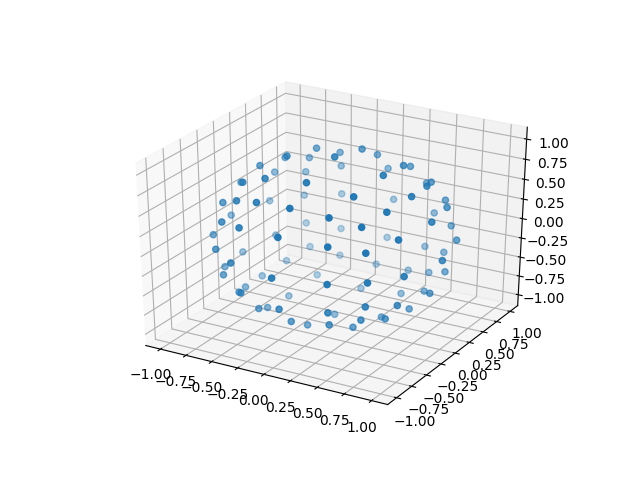

(-1.1, 1.1, -1.1, 1.1)

In [4]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

ax.scatter( mypts[0,:], mypts[1,:], mypts[2,:] )
plt.axis( 'tight' )

## Sampling the space of rotations $SO(3)$ using `SNSampler`

In [5]:
so3 = sampler.SNSampler( n_dims=4, n_samples=20 )
so3.removeRedundantRotations() # only canonical quaternions retained
quats = so3.sample_points # each column of 'quats' denotes a versor
so3.getRMatsFromQuats()

The last command above computes the corresponding rotation matrices within the `so3` object as $3 \times 3 \times N$-sized arrays.
These can easily be accessed with: 

In [6]:
rmat, rmatinv = so3.RMat, so3.RMatInverse
rmat.shape, rmatinv.shape

((3, 3, 27512), (3, 3, 27512))

It is easily shown that each $3 \times 3$ slice of `rmat` and `rmatinv` are rotation matrices that are also inverses of each other.

## Reference

Yershova, A., & LaValle, S. M.,
"[Deterministic sampling methods for spheres and SO(3)](https://ieeexplore.ieee.org/abstract/document/1308891)",
_In IEEE International Conference on Robotics and Automation, 2004. Proceedings_. ICRA'04. 2004 (**Vol. 4, pp. 3974-3980**). 